# Motion of a Pendulum
---
PRE-REQUISITES:
- [ode-solve-euler.ipynb](https://github.com/ejwest2/NumericalMethods/blob/master/ODESolve/ode-solve-euler.ipynb)

SEE ALSO:
- [oscillator.ipynb](https://github.com/ejwest2/NumericalMethods/blob/master/ODESolve/oscillator.ipynb)
- [projectile.ipynb](https://github.com/ejwest2/NumericalMethods/blob/master/ODESolve/projectile.ipynb)

In [4]:
%run euler_step.py
%run euler_midpt_step.py
%run euler_meanval_step.py

Turning point at time t= 3.200000

Turning point at time t= 6.600000
Estimated period = 6.800000 

Turning point at time t= 10.000000
Estimated period = 6.800000 

Turning point at time t= 13.800000
Estimated period = 7.600000 

Turning point at time t= 18.400000
Estimated period = 9.200000 

Average period = 7.6 +/- 0.438178 



<IPython.core.display.Javascript object>


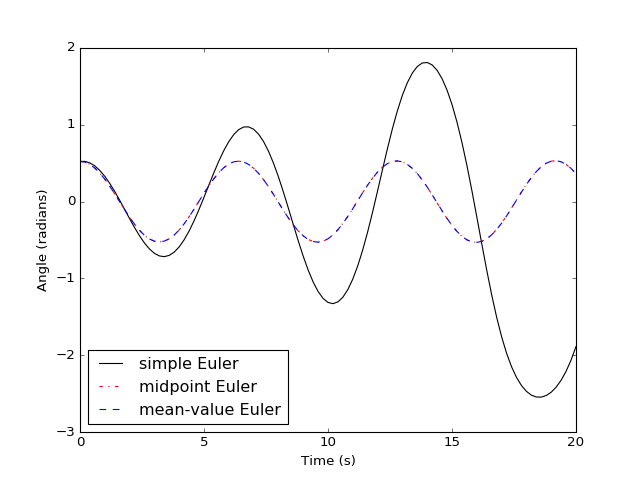

In [5]:
# pendulum
"""
Program to compute the motion of a pendulum 
"""

import numpy as np

# pendulum rhs function
def f (t, x):
    dxdt = np.zeros(2)
    dxdt[0] = x[1]
    dxdt[1] = -np.sqrt(g/L)*np.sin(x[0])
    return dxdt

# set the physical constants
g = 9.81

# set length of pendulum
#L = float(input('Enter pendulum length (in meters): '))
L = 10.0

# set initial angle of pendulum 
#thetaDeg0 = float(input('Enter initial angle (in degrees): '))
thetaDeg0 = 30.0
theta0 = thetaDeg0*np.pi/180  # convert angle to radians 

# set initial velocity of pendulum
#v0 = float(input('Enter initial speed (in m/s): '))
v0 = 0.0
omega0 = v0/L

# number of steps, time grid, stepsize
#tStart = float(input('Enter start time (in seconds): ')) 
#tEnd = float(input('Enter end time (in seconds): ')) 
#nsteps = int(input('Enter number of time steps: ')) 
tStart = 0.0
tEnd = 20.0
nsteps = 100
h = (tEnd - tStart)/nsteps
t = np.linspace(tStart, tEnd, nsteps + 1)
#print('Stepsize = %g \n' % h)

# initialize output arrays (euler)
x = np.zeros((2, nsteps + 1))
x[0] = theta0
x[1] = omega0

# initialize output arrays (midpoint euler)
x_mid = np.zeros_like(x)
x_mid[0] = x[0]
x_mid[1] = x[1]

# initialize output arrays (mean-value euler)
x_mv = np.zeros_like(x)
x_mv[0] = x[0]
x_mv[1] = x[1]

# initialize variables for period estimation
itp = 0
period = []

# numerical solution 
for i in range(0, nsteps): 

    # apply ODE-solver step
    x[:, i+1] = euler_step(t[i], x[:, i], f, h)
    x_mid[:, i+1] = euler_midpt_step(t[i], x_mid[:, i], f, h)
    x_mv[:, i+1] = euler_meanval_step(t[i], x_mv[:, i], f, h)
    t[i+1] = t[i] + h

    # test for turning point passage 
    # by checking for a sign change in the angular velocity  
    if x[1, i+1]*x[1, i] < 0:
        
        # if yes, record time and estime the period
        print('Turning point at time t= %f' % t[i])
        tp_current = t[i]

        # test if this is the first turning point passage
        if itp == 0:
            # if yes, skip period estimation
            print('')
            tp_prev = tp_current 
        else:
            # else, estimate the period using current and previous 
            # turning point times
            period = np.append(period, 2*(tp_current - tp_prev))
            print('Estimated period = %f \n' % period[itp - 1])
            tp_prev = tp_current

        # increment turning point counter
        itp = itp + 1 

# estimate period of oscillation, including error bar 
avgPeriod = np.mean(period)
errorBar = np.std(period)/np.sqrt(itp)
print('Average period = %g +/- %g \n' % (avgPeriod, errorBar))

# plot the results
import matplotlib.pyplot as plt
%matplotlib notebook
fig, ax1 = plt.subplots(1,1)
ax1.plot(t, x[0, :],'k-', label='simple Euler')
ax1.plot(t, x_mid[0, :],'r-.', label='midpoint Euler')
ax1.plot(t, x_mv[0, :],'b--', label='mean-value Euler')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Angle (radians)')
ax1.legend(loc='lower left')
fig.show()